In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Learning Objectives

1. Name and recognize the two interfaces to matplotlib
2. Be able to use both interfaces to generate charts
3. Understand the connection between matplotlib and seaborne/pandas
4. Make plots with multiple datasets, and figures
5. Know the recommended functional form for writing your own plotting functions

# Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* Seaborn
* **Matplotlib**
* **Pandas**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.

# Appreciating the challenges

A good plotting library should:

* Be easy to use.
* Allow plotting of all kinds of data.
* Support arbitrarily fine-grained control.
* Support a variety of backends to make graphs in various formats.

# Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used matplotlib. This makes it the de-facto choice for plotting in python.

## How does it work?

In an effort to make easy things easy, and hard things possible, matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |
| pure OO interface | Embed plots in GUI applications | too high |

# plt examples

Here are some numbers to plot.

In [6]:
x = np.arange(0.1, 4, .2)

In [7]:
x #it's just an array!

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9])

In [8]:
# vectorized operations at work
y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.exp(x)/100

In [9]:
y0 #it's just an array!

array([ 0.09983342,  0.29552021,  0.47942554,  0.64421769,  0.78332691,
        0.89120736,  0.96355819,  0.99749499,  0.99166481,  0.94630009,
        0.86320937,  0.74570521,  0.59847214,  0.42737988,  0.23924933,
        0.04158066, -0.15774569, -0.35078323, -0.52983614, -0.68776616])

`plt.scatter(x, y)` takes an array of horizontal coordinates `x` and an array of vertical coordinates `y` and draws a dot at each specified point in the Cartesian plane.

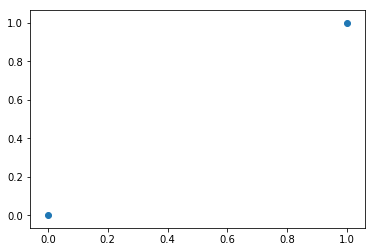

In [11]:
# simplest thing possible
plt.scatter( x=[0, 1], y=[0,1] )
plt.show()

Text(0, 0.5, 'vert')

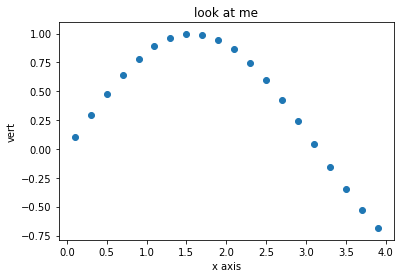

In [13]:
plt.scatter(x, y0)
plt.title("look at me")
plt.xlabel('x axis')
plt.ylabel('vert')

Some properties under your control are, for example, color, size, and marker style.

#### [scatter() documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

Text(0, 0.5, 'vert')

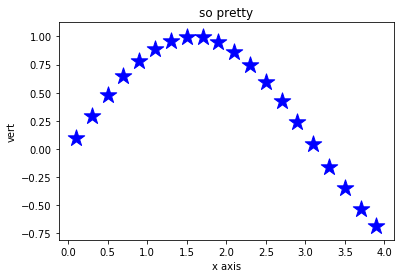

In [15]:
plt.scatter(x, y0, 
            color='b',
            s=300, 
            marker='*')
plt.title("so pretty")
plt.xlabel('x axis')
plt.ylabel('vert')

`plt.plot(x,y)` draws a line between each point instead of just drawing points.

Text(0, 0.5, 'vert')

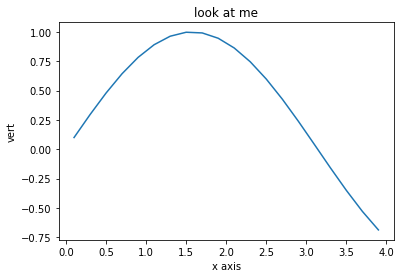

In [16]:
plt.plot(x, y0)
plt.title("look at me")
plt.xlabel('x axis')
plt.ylabel('vert')

You can change the color, line thickness, line style (solid, dashed, etc.) and you can even choose to draw the points as well.

#### [plot() documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
#### [Line property documentation](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

Text(0, 0.5, 'vert')

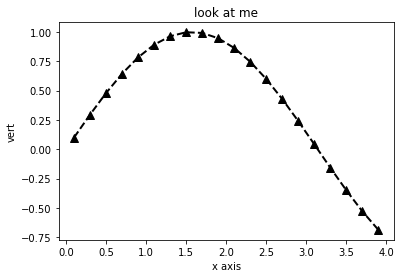

In [17]:
plt.plot(x, y0, 
         color='k', 
         linestyle='--',
         linewidth=2,
         marker='^', 
         markersize=8)
plt.title("look at me")
plt.xlabel('x axis')
plt.ylabel('vert')

You can draw multiple plots on the same axes simply by calling the plotting functions multiple times. You can also add labels to each plot and a legend. And you can add text at arbitrary locations with `plt.text()` (and yes, [Latex](https://matplotlib.org/users/usetex.html) is supported!)

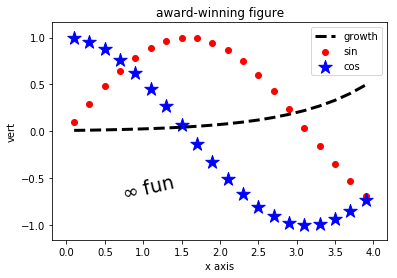

In [18]:
plt.scatter(x, y0, 
            color='r', label='sin')

plt.scatter(x, y1, 
            color='b', marker='*', s=200, label='cos')

plt.plot(x, y2, 
         color='k', linewidth=3, linestyle="--", label='growth')

plt.title("award-winning figure")
plt.xlabel('x axis')
plt.ylabel('vert')
plt.legend()

plt.text(0.7, -0.6, 
         "$\infty$ fun", 
         fontsize=19, 
         rotation=13)

plt.savefig('uhh.png') # saving a figure is easy!

## Weird

`plt` was imported as a library, but it appears to be keeping track of some state that gets modified by each plotting function call, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

If you think it's strange that we're working in Python, where "everything is an object", but there doesn't seem to be any objects required to make our image, **join the club**!



# Behind the curtain

![Matplotlib diagram](http://matplotlib.org/_images/fig_map.png)



# The OO interface

Text(0, 0.5, 'vertical axis')

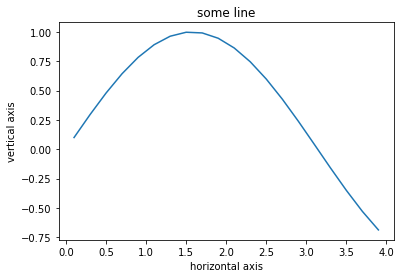

In [20]:
# create the figure object
fig = plt.figure() 

# create a single "axes" object
# inside this figure
# more about the "1,1,1" in a moment
ax = fig.add_subplot(1,1,1) 

# plot data on those axes
ax.plot(x, y0)

# add a title
ax.set_title('some line')

# add axis labels
ax.set_xlabel('horizontal axis')
ax.set_ylabel('vertical axis')

In this example, the fact that state is maintained is less surprising.

All the plot style keywords we saw above (color, linewidth, etc.) are the same in `ax.plot()` and `ax.scatter()`.

Matplotlib provides a more compact function for initializing a figure & axes: `plt.subplots` (note: different from `plt.subplot`, sorry)

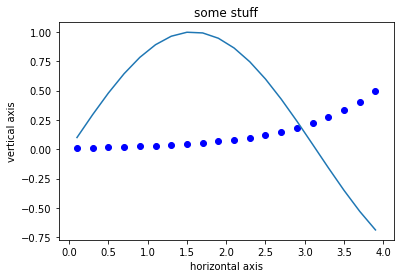

In [22]:
# this is a shorter way to create 
# a single blank figure & axes
fig, ax = plt.subplots()

ax.plot(x,y0)

ax.set_title('some stuff')
ax.set_xlabel('horizontal axis')
ax.set_ylabel('vertical axis')

# let's add another plot on these axes
ax.scatter(x, y2, color='b')

Why all the reference to "subplots"? Matplotlib is aiming to be as general as possible here. A single figure could contain many axes, and matplotlib asks you to specify the positions of these axes according to a grid.

If unspecified, `plt.subplots()` returns a 1 by 1 grid with a single axes object.

`plt.subplots(n,m)` specifies a grid with `n` rows and `m` columns, with an axes object in each grid square. These axes objects are returned in a numpy array.

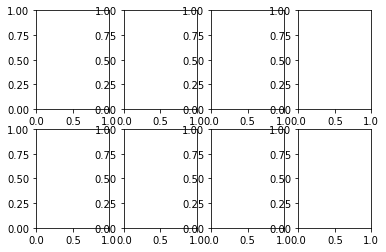

In [24]:
fig, axs = plt.subplots(2,4) #not always pretty

In [25]:
type(axs)

numpy.ndarray

In [28]:
axs #return of the 'object' ndarray dtype

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b3d52b0>,
      dtype=object)

In [29]:
axs.shape

(2, 4)

In [30]:
axs[0,2]

In [31]:
dum_ax = axs[0,2]

So to plot on one of those axes, I can index into the array of axes objects, then call all the plotting methods I want

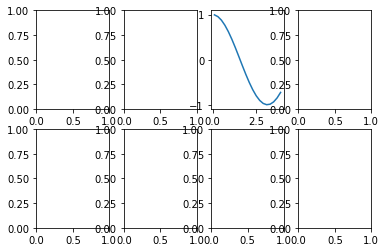

In [33]:
fig, axs = plt.subplots(2,4)
axs[0,2].plot(x,y1)

Ugly overlapping text can be fixed with `plt.tight_layout()`, and figure size can be controlled with the `figsize` keyword of `plt.subplots()`.

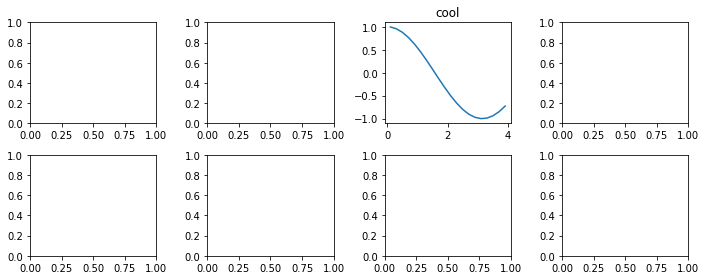

In [34]:
fig, axs = plt.subplots(2,4, figsize=(10,4))

axs[0,2].plot(x,y1)
axs[0,2].set_title('cool')

plt.tight_layout()

Note that I used `ax` to name a single axes object and `axs` to name an array of axes objects. This is a useful distinction.

### Iterating over axes in a subplot

Making a big grid of axes and manually indexing into each one to make a plot sounds terrible. Let's loop over this collection of axes instead.

We can't just type `for ax in axs`, however, because iterating over an `n` by `m` numpy array returns one _row_ at a time and NOT one _element_ at a time. So instead we use the `.flatten()` method to squish a numpy array into a one-dimensional array of its elements.

In [35]:
foo = np.random.randint(60, size=(4,3))

In [36]:
foo

array([[24, 47,  5],
       [35, 38, 33],
       [32, 31, 41],
       [36, 22, 16]])

In [38]:
# oh no, just rows
for thing in foo:
    print(len(thing))

3
3
3
3


In [39]:
# h-e-double-toothpicks yes, it's every item
foo.flatten() #always makes a copy of underlying data

array([24, 47,  5, 35, 38, 33, 32, 31, 41, 36, 22, 16])

In [43]:
foo.ravel() #may or may not copy underlying data

array([24, 47,  5, 35, 38, 33, 32, 31, 41, 36, 22, 16])

In [44]:
foo.shape

(4, 3)

In [45]:
foo.flatten().shape

(12,)

In [46]:
for thing in foo.flatten():
    print(thing**2)

576
2209
25
1225
1444
1089
1024
961
1681
1296
484
256


In [47]:
axs.shape

(2, 4)

In [48]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b91cb38>,
      dtype=object)

In [49]:
axs.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b91cb38>,
      dtype=object)

In [50]:
axs.flatten().shape

(8,)

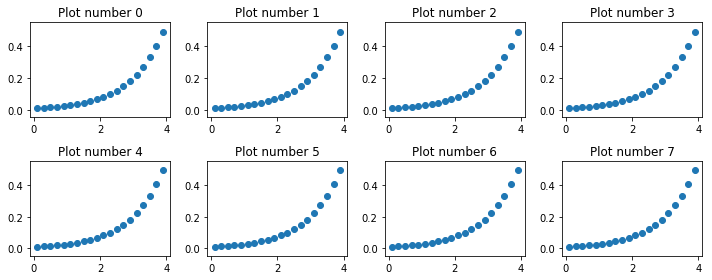

In [51]:
fig, axs = plt.subplots(2,4, figsize=(10,4))

for i, ax in enumerate(axs.flatten()):
    ax.scatter(x,y2)
    ax.set_title('Plot number {}'.format(i))

plt.tight_layout()

In [52]:
type(axs.flatten())

numpy.ndarray

## What about the lines being drawn? Are those objects, too?
Yes. `ax.plot()` creates the line object and returns it as well as drawing it.

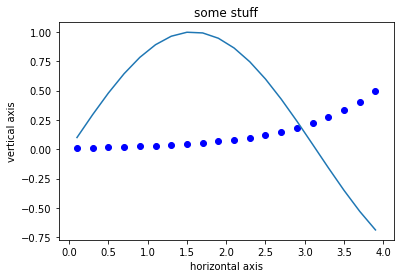

In [55]:
fig, ax = plt.subplots()

plot1_stuff = ax.plot(x,y0)

ax.set_title('some stuff')
ax.set_xlabel('horizontal axis')
ax.set_ylabel('vertical axis')

plot2_stuff = ax.scatter(x, y2, color='b')

In [56]:
plot1_stuff

In [57]:
type(plot1_stuff)

list

In [58]:
plot1_stuff[0]

In [59]:
line1 = plot1_stuff[0]

In [60]:
line1.get_c()

'#1f77b4'

In [39]:
# experiment here!

# Mix 'n' Match

Turns out, you can combine `plt` and object-oriented approach. Sound confusing? It is. You should avoid it if you can. 

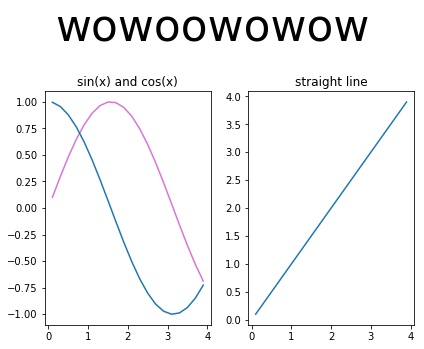

In [62]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
plt.title('sin(x) and cos(x)')

ax2 = fig.add_subplot(1,2,2)
plt.title('straight line')

ax1_stuff = ax1.plot(x, y0, color='m', alpha=.25)

ax1.plot(x, y1)

# ax1_stuff[0].set_alpha(.25) # alternative to using the alpha keyword when calling ax.plot

ax2.plot(x, x)

line = ax1_stuff[0]
line.set_alpha(.55)

fig.suptitle('wowoowowow', fontsize=44, y=1.2)
fig.tight_layout()

# Why should we use the OO oriented approach?

The "functional" `plt` interface is fine for simple plots.

However, as soon as you want fine-grained control over each aspect of your figure (especially if it has more than one set of axes), you will find the OO interface vastly less frustrating. 

# More about subplots

`plt.subplots(n, m)` creates an `n` by `m` grid with an axes object in each grid box.

What if you want to add a single set of axes in an arbitrary location over your figure?

`plt.add_subplot(p, q, i)` creates a single axes object at box `i` of a `p` by `q` grid. 

This gives you a lot of control over possible figure layouts. Here's an example.

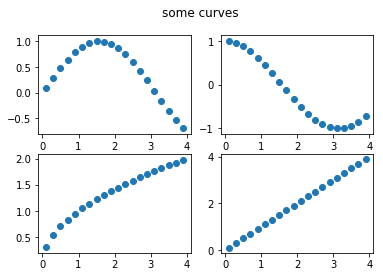

In [63]:
# start with a 2 by 2 grid
fig, axs = plt.subplots(2, 2)

# let's plot a different function in each box

y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for ax, y_func in zip(axs.flatten(), y_funcs):
    ax.scatter(x, y_func(x))
    
fig.suptitle('some curves');

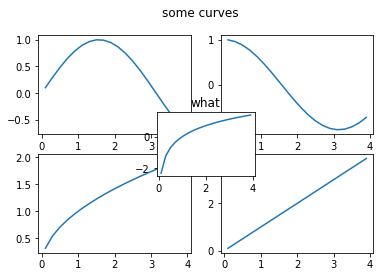

In [64]:
# start with a 2 by 2 grid
fig, axs = plt.subplots(2, 2)

# let's plot a different function in each box

y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for ax, y_func in zip(axs.flatten(), y_funcs):
    ax.plot(x, y_func(x))
    
fig.suptitle('some curves')

# now let's add a small plot in the center
# imagine overlaying a 3 by 3 grid on the figure
# if call the upper left square #1, then the 
# center square would be #5
ax_center = fig.add_subplot(3, 3, 5)

ax_center.plot(x, np.log(x))

ax_center.set_title('what');

In [65]:
fig.axes

In [66]:
plt.gcf() # get current figure

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [67]:
ax_center.set_title('hoo yeah')

Text(0.5, 1.0, 'hoo yeah')

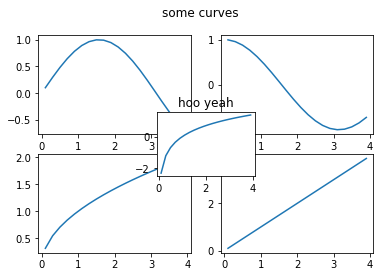

In [68]:
fig

# What about pandas?

Pandas has its own convenient methods for hooking into matplotlib.

In [47]:
import pandas as pd

In [71]:
df = pd.DataFrame({'x':x, 
                   'sinx':np.sin(x), 
                   'cosx':np.cos(x),
                   'rand':np.random.rand(len(x))})
df = df.set_index('x')
df.head()

,sinx,cosx,rand
x,,,
0.1,0.099833,0.995004,0.866725
0.3,0.295520,0.955336,0.907591
0.5,0.479426,0.877583,0.435717
0.7,0.644218,0.764842,0.682649
0.9,0.783327,0.621610,0.510701


In [ ]:
df.plot?

In [73]:
df['cosx'].head()

x
0.1    0.995004
0.3    0.955336
0.5    0.877583
0.7    0.764842
0.9    0.621610
Name: cosx, dtype: float64

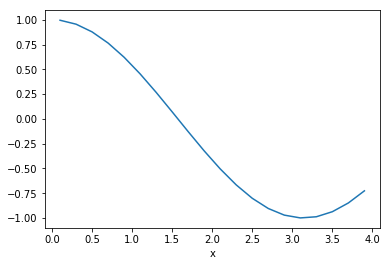

In [74]:
df['cosx'].plot();

Calling the plot method on a pandas series returns a familiar matplotlib axes object, which we can continue to modify.

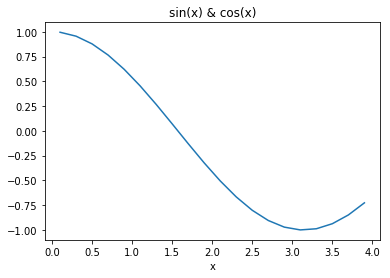

In [75]:
ax1 = df['cosx'].plot()
ax1.set_title('sin(x) & cos(x)');

We can also pass an axes object to the `.plot()` method, meaning we have full control over where the plot ends up.

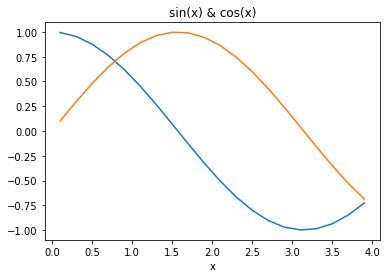

In [76]:
ax1 = df['cosx'].plot()
ax1.set_title('sin(x) & cos(x)')
df['sinx'].plot(ax=ax1);

Quite useful in subplots.

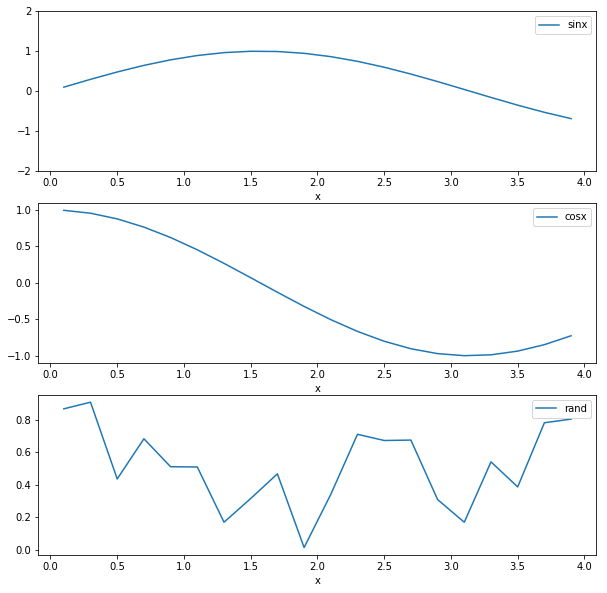

In [77]:
fig, ax_list = plt.subplots(3,1, figsize=(10,10))

cols = df.columns
for ax, col in zip(ax_list.flatten(), cols):
    df[col].plot(ax=ax)
    ax.legend()
    
top_ax = ax_list[0]
top_ax.set_ylim(bottom=-2, top=2);

In [78]:
ax_list.flatten().shape

(3,)

### Cool pandas plotting methods

In [79]:
df = pd.read_csv('data/winequality-red.csv', sep=';')

In [80]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


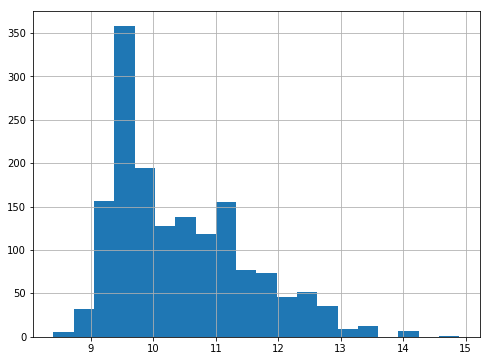

In [81]:
df['alcohol'].hist(figsize=(8,6), bins=20);

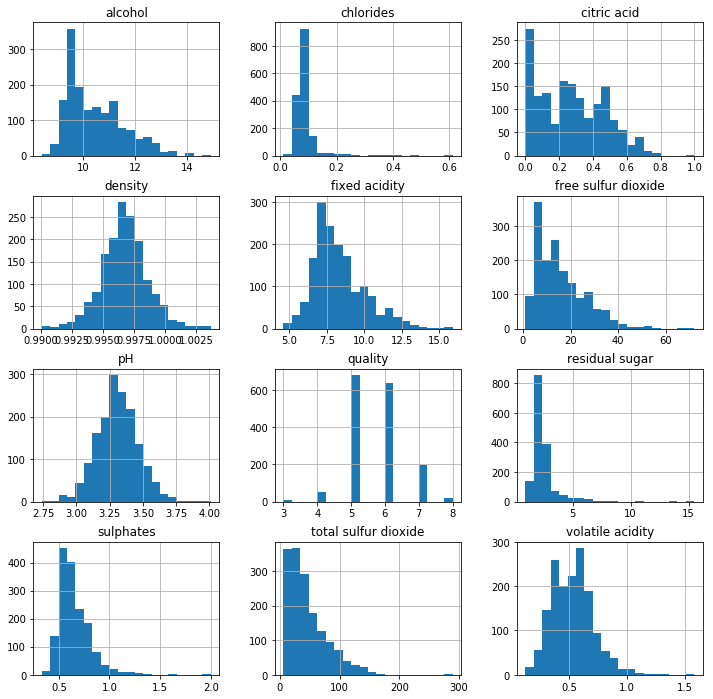

In [82]:
df.hist(figsize=(12,12), bins=20);

There's a lot going on behind the scenes in that one command. Here's how we would write it the long way:

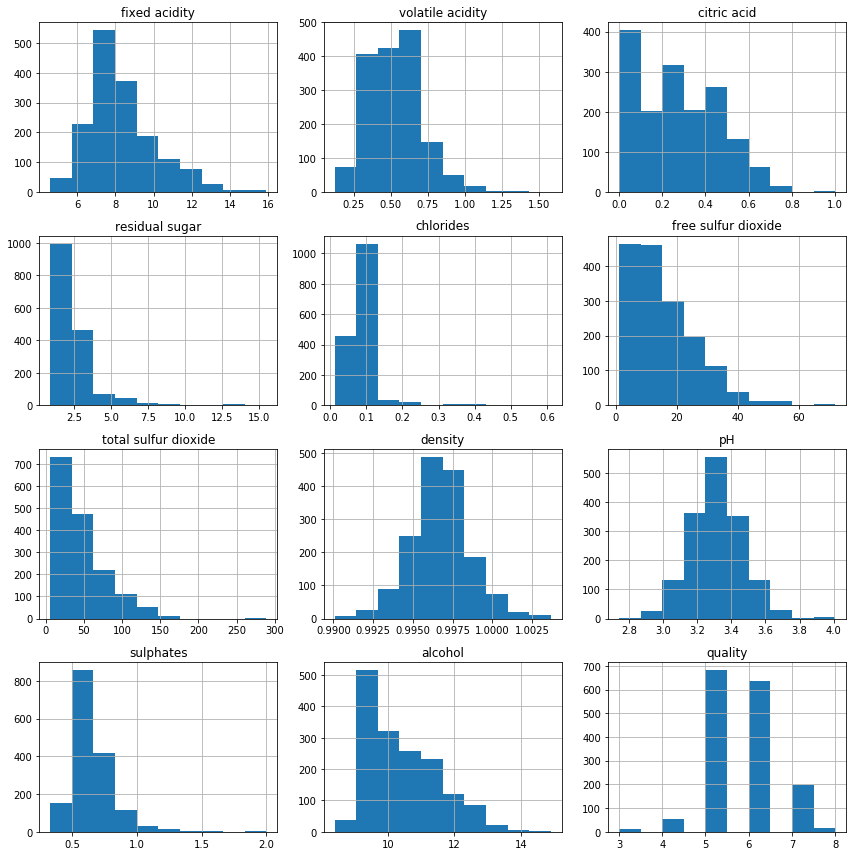

In [83]:
fig, axes = plt.subplots(4,3, figsize=(12,12))
for cell_ax, col in zip(axes.flatten(), df.columns):
    df[col].hist(ax=cell_ax)
    cell_ax.set_title(col)
fig.tight_layout() 

In [84]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c036940>,
      dtype=object)

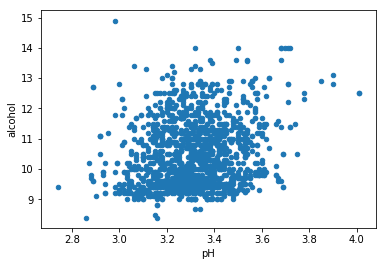

In [85]:
df.plot.scatter('pH', 'alcohol');


In [86]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [87]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [88]:
mask = (df['quality'] == 5)

In [89]:
mask.head()

0     True
1     True
2     True
3    False
4     True
Name: quality, dtype: bool

In [90]:
(~mask).head()

0    False
1    False
2    False
3     True
4    False
Name: quality, dtype: bool

In [91]:
df[mask].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [92]:
df[~mask].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4


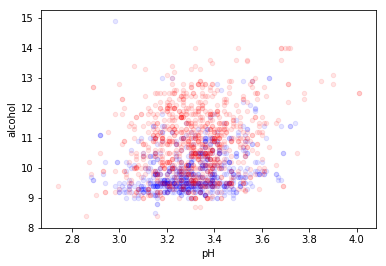

In [93]:
ax = df[mask].plot.scatter('pH', 'alcohol', color='b', alpha=0.1)
df[~mask].plot.scatter('pH', 'alcohol', color='r', alpha=0.1, ax=ax);

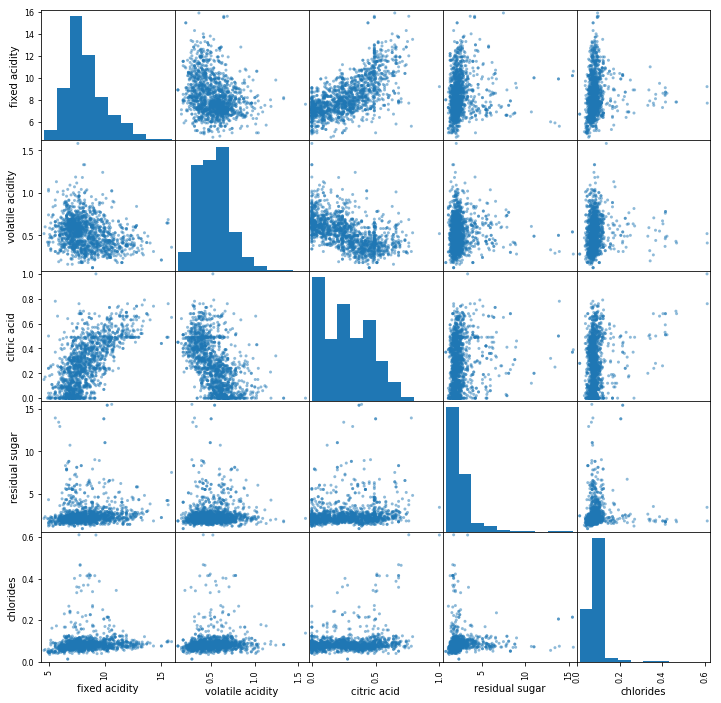

In [94]:
pd.plotting.scatter_matrix(df.iloc[:,:5], figsize=(12,12));

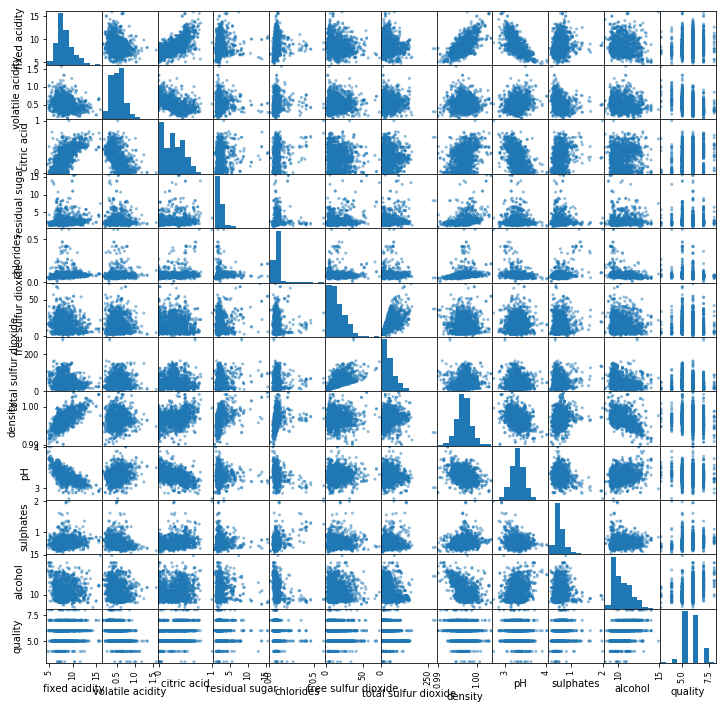

In [95]:
pd.plotting.scatter_matrix(df, figsize=(12,12));

# Writing plotting functions

### Quick tip: passing arbitrary numbers of arguments & keyword arguments

In [96]:
def our_own(*args, **kwargs):
    print(args)
    print(kwargs)
our_own(1,2,3, one=1, two=2)

(1, 2, 3)
{'one': 1, 'two': 2}


### another quick reminder: unpacking

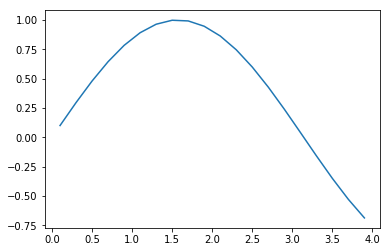

In [98]:
data = (x, y0)
plt.plot(*data)

In [99]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

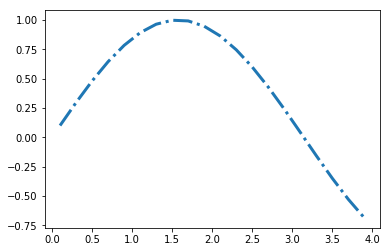

In [100]:
fig, ax = plt.subplots()
out = my_plotter(ax, x, y0, {'linewidth':3, 'linestyle':'-.'})

In [101]:
ax

In [102]:
out

# Example:
Let's write a function that draws some data, and some horizontal
lines representing the 25th and 75th percentile.

We'll call it iqr_plot.

### I do: 
a function for drawing a horizontal line at some point.

### We do: 
write the iqr_plot function.

### You do: 
make a 2 by 2 grid of plots using this function.


In [103]:
#plt.hlines?

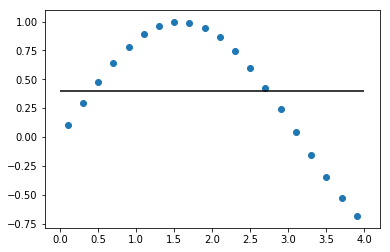

In [105]:
fig, ax = plt.subplots()
ax.scatter(x, y0)
ax.hlines(0.4, 0, 4);

In [106]:
def my_hline(ax, x_data, y_level):
    """
    Plots a horizontal line through the data at y = y_level
    
    Parameters:
        ax (axes object): axes to plot on
        x_data (numpy array): horizontal coordinates of data
        y_level (float): vertical coordinate of the line
        
    Returns:
        out (list): list of artists added        
    """
    ax.hlines(y_level, x_data.min(), x_data.max())

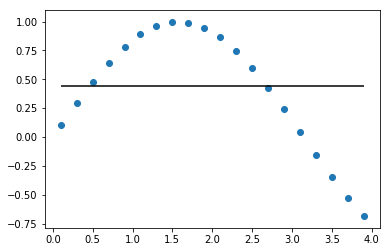

In [108]:
fig, ax = plt.subplots()

ax.scatter(x, y0)

my_hline(ax, x, 0.44)

In [109]:
def my_hline2(ax, x_data, y_level):
    out = ax.plot([x_data.min(), x_data.max()], 
           [y_level, y_level],
                 color='k',
                 linestyle=':',
                 linewidth=5)
    return out

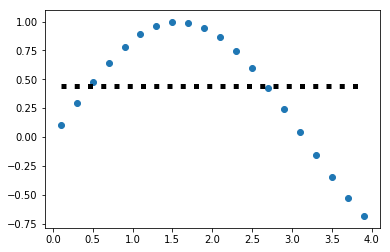

In [110]:
fig, ax = plt.subplots()

ax.scatter(x, y0)

my_hline2(ax, x, 0.44)

In [112]:
np.percentile(y0, [25,75])

array([0.08527023, 0.87020887])

In [113]:
foo, bar = np.percentile(y0, [25,75])

In [114]:
foo

0.08527022809344363

In [115]:
bar

0.870208865002014

In [116]:
def iqr_function(ax, x_data, y_data):
    q25, q75 = np.percentile(y_data, [25,75])
    
    out1 = ax.scatter(x_data, y_data)
    
    out2 = my_hline2(ax, x_data, q25)
    out3 = my_hline2(ax, x_data, q75)
    return [out1] + out2 +out3

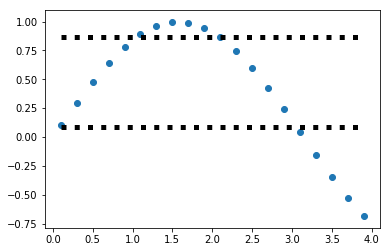

In [117]:
fig, ax = plt.subplots()


stuff = iqr_function(ax, x, y0)

In [118]:
stuff

In [119]:
y_4 = np.random.randint(100, size=101)

In [121]:
x

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9])

In [123]:
x.shape

(20,)

In [124]:
y_4

array([64, 52, 38, 39, 78, 55, 83, 23, 68,  9, 67, 96, 92, 39, 27,  3, 11,
       57, 88, 97, 58, 86, 55, 82, 18, 31, 64, 42, 33, 22, 59, 51, 88, 99,
       84, 68, 42, 35, 42, 37, 87, 72, 92, 14, 50, 88, 50, 56, 17, 95, 50,
        2, 92, 83, 13, 26, 49, 74, 93, 93, 38, 90,  7, 56, 19, 46, 64,  3,
       34, 32, 77,  6, 20, 84, 66, 40, 90,  9,  3, 43, 55, 63, 68,  6, 55,
       83, 55, 54, 97, 40, 41, 18,  3, 63, 32, 49, 49, 51, 48, 73, 23])

ValueError: x and y must be the same size

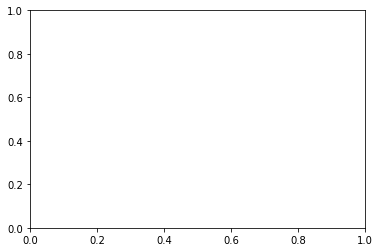

In [125]:
plt.scatter(x, y_4)

In [126]:
y_4 = list(range(20))

In [127]:
len(y_4)

20

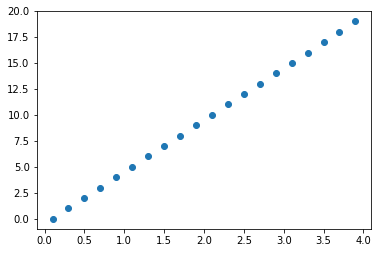

In [128]:
plt.scatter(x, y_4)

In [129]:
y_4[11] = None

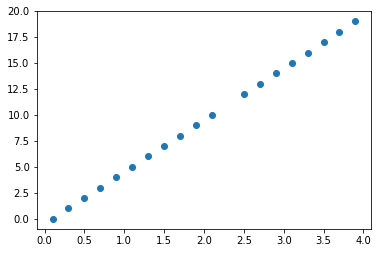

In [131]:
plt.scatter(x, y_4)

Text(0.5, 0.98, 'some curves')

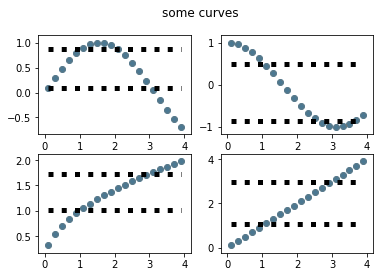

In [132]:
# start with a 2 by 2 grid
fig, axs = plt.subplots(2, 2)

# let's plot a different function in each box

y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for ax, y_func in zip(axs.flatten(), y_funcs):
    iqr_function(ax, x, y_func(x))
    ax.scatter(x, y_func(x), alpha=0.2)

    
fig.suptitle('some curves')

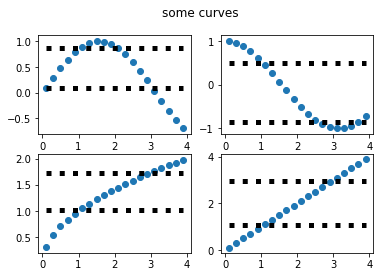

In [133]:
# start with a 2 by 2 grid
fig, axs = plt.subplots(2, 2)

# let's plot a different function in each box

y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for ax, y_func in zip(axs.flatten(), y_funcs):
    iqr_function(ax, x, y_func(x))
    
fig.suptitle('some curves');

In [134]:
# def iqr_plot(ax, x_data, y_data):
#     #plot 3 things, 2 horizontal lines, data itself.
#     data_line = ax.plot(x_data, y_data)
#     pct_75 = np.percentile(y_data, 75)
#     pct_25 = np.percentile(y_data, 25)
#     upper = horizontal_line(ax, x_data, pct_75)
#     lower = horizontal_line(ax, x_data, pct_25)
#     return data_line + upper + lower
# fig, axes = plt.subplots(1,1)
# lines = iqr_plot(axes, x_data, y_data_1)
# axes.set_title("IQR Plot")


In [135]:
# lines

In [136]:
# fig, ax_list = plt.subplots(2,2, figsize=(10,10))
# Y = [f(x_data) for f in [np.sin, np.cos, np.exp, lambda x: x**4]]
# for ax, y_data in zip(ax_list.flatten(), Y):
#     ax.scatter(x_data, y_data)